# NOTEBOOK EDA
## In this notebook you can find several plots generated from the dataset after the wrangling process. Below each plot, there are insights provided based on the plots 

### Libraries


In [7]:
# Importing essential libraries:
# - pandas and numpy for data manipulation and analysis
# - matplotlib and seaborn for data visualization
# - sqlalchemy for database connection and SQL operations
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sqlalchemy import create_engine

In [8]:
# Load the cleaned dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('./Dataset_credit_cards_df.csv')

In [9]:
# Display the first 5 rows of the dataset
df.head()

,nombre_tarjeta,Tasa de interés mensual,Ingreso mínimo,Cuota de manejo,Marca,Solicitar,Costo de avance en efectivo,Tipo de tarjeta,Tasa de interes no informada,ingreso minimo no informado,Disponibilidad
0,Tarjeta de Crédito Bancolombia Mastercard Joven,2.01,200000.0,15490,mastercard,Online,6900,Internacional,1,1,1
1,Tarjeta de Crédito Banco de Occidente Masterca...,2.24,500000.0,16300,mastercard,Online,6800,Internacional,1,1,1
2,Tarjeta de Crédito Banco de Occidente Visa Joven,2.24,500000.0,16300,visa,Online,6800,Internacional,1,1,1
3,Tarjeta de Crédito Davivienda Visa Liviana,2.16,1423500.0,20000,visa,Presencial,6400,Internacional,1,1,1
4,Tarjeta de Crédito Davivienda Diners Club Liviana,2.16,1423500.0,20000,diners club,Presencial,6400,Internacional,1,1,1


In [10]:
# Convert the column 'Ingreso mínimo' to nullable integer type (Int64) for consistent numeric representation
df['Ingreso mínimo'] = df['Ingreso mínimo'].astype('Int64')

### To extract the bank from the credit card names and identify differences between them  

In [11]:
# Create a new column 'Bancos' initialized with None.  
# Define a function that iterates through each row of the DataFrame and assigns a bank name to the column 'Bancos' 
# if the bank's name appears in the 'nombre_tarjeta' string.
df['Bancos'] = None
def columna_bancos(lista_bancos):
    for i in range(len(df)):
        for nombre in lista_bancos:
            if nombre in df.loc[i, 'nombre_tarjeta']:
                df.loc[i, 'Bancos'] = nombre
                break
            


In [12]:
columna_bancos(['Itaú', 'BBVA', 'AV Villas', 'Cencosud', 'Finandina', 'GNB', 'Falabella', 'Scotiabank', 'Davivienda', 'CODENSA'])
columna_bancos(['Banco de Occidente', 'Banco de Bogotá', 'Bancoomeva', 'Banco Caja Social', 'Banco Popular', 'Bancolombia'])

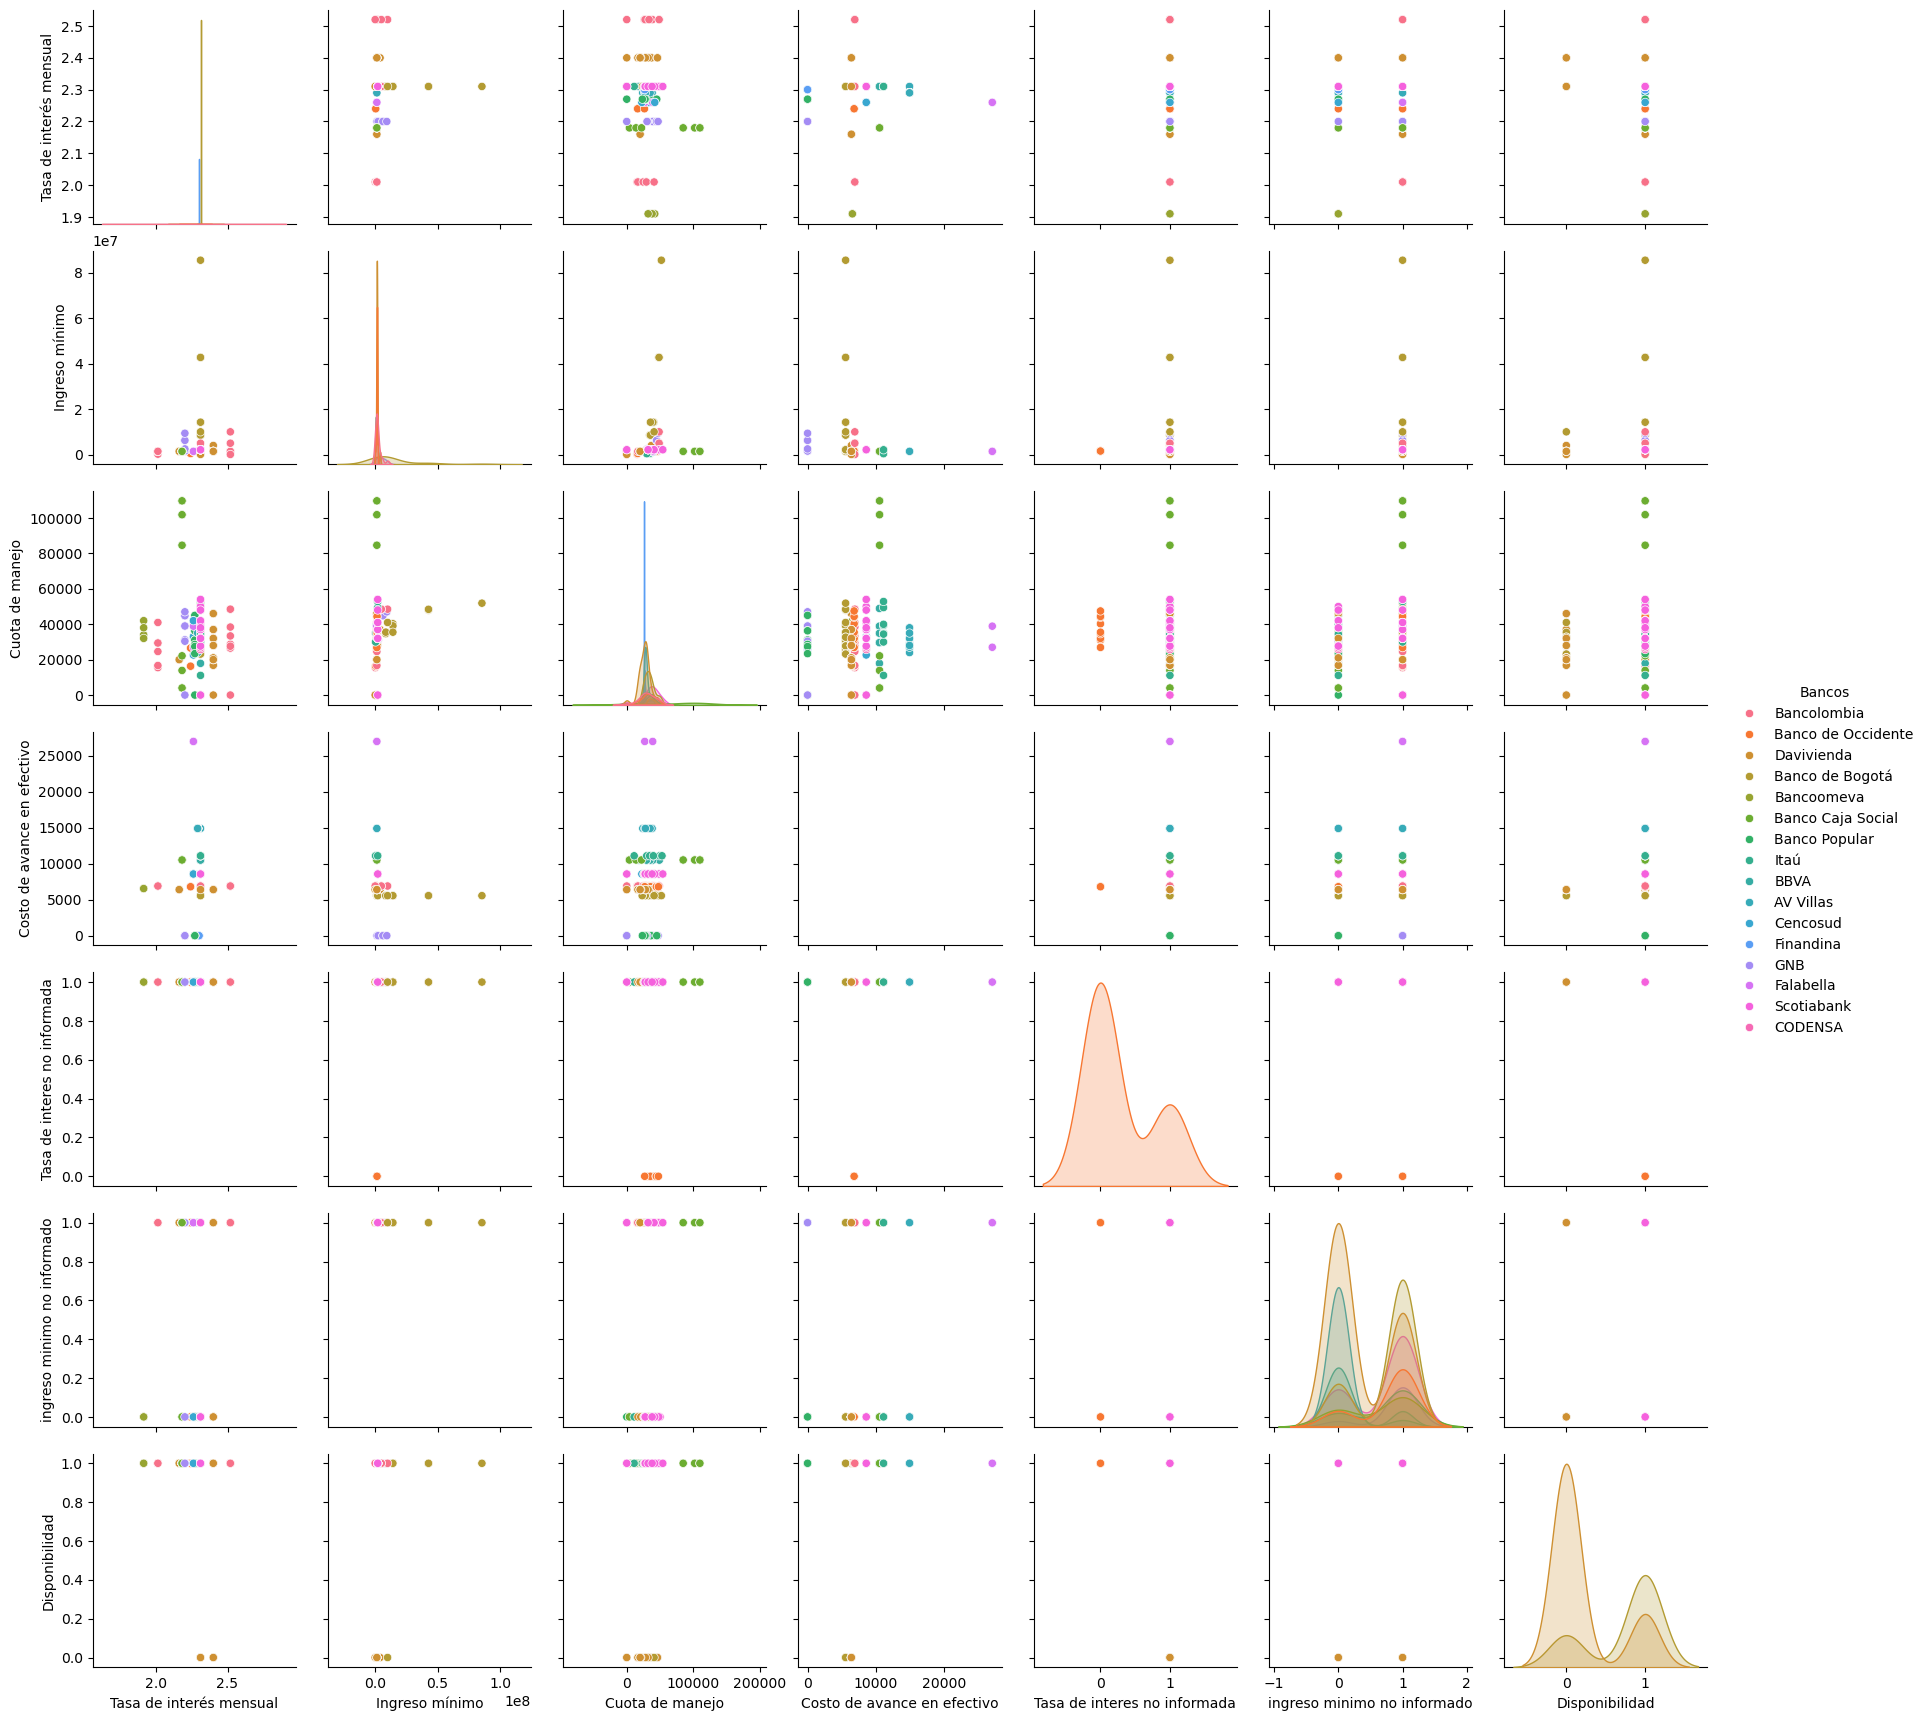

In [22]:
sns.pairplot(df, hue='Bancos')

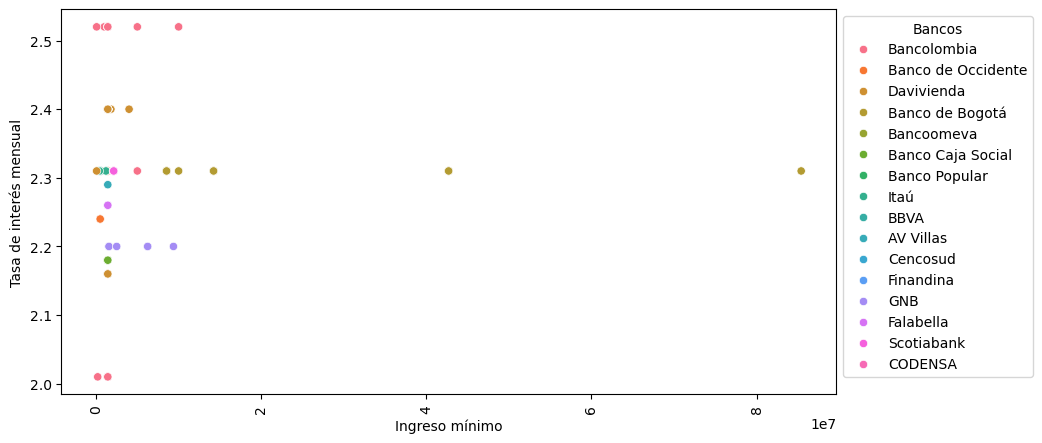

In [13]:
# Creates a scatter plot showing the relationship between 'Ingreso mínimo' (minimum income) and 
# 'Tasa de interés mensual' (monthly interest rate), with points colored by bank ('Bancos').
# The x-axis labels are rotated for better readability, and the legend is moved outside the plot.
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='Ingreso mínimo', y='Tasa de interés mensual', data=df, hue='Bancos')
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

#### The points in the visualization are quite consistenly, clustering around 2.4 and 2.2 interest rate. Only a few Bancolombia credit cards as outliers with either higher or lower interest rate. additionally, some Banco Caja Social credit cards require a very high min income, which may be justified by the benefits and services they offer 

<Axes: xlabel='Marca', ylabel='Ingreso mínimo'>

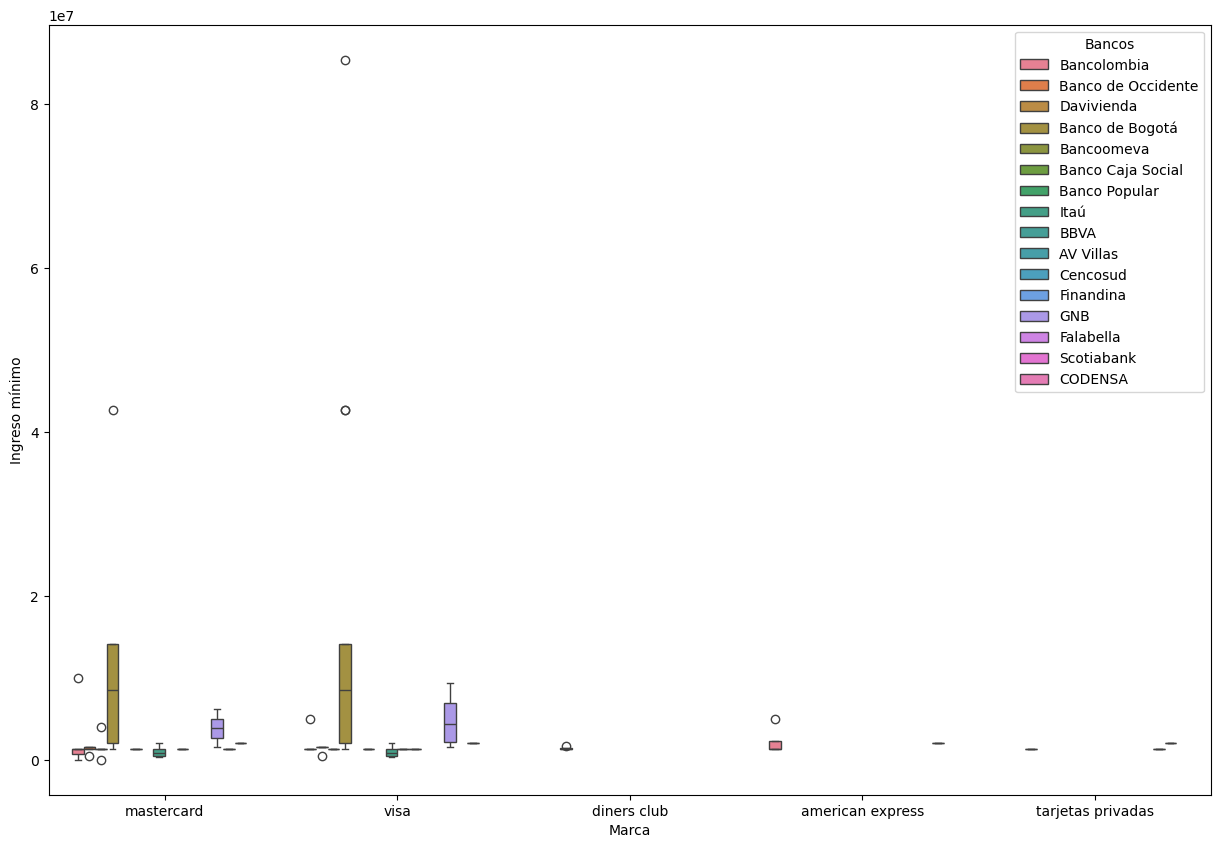

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Ingreso mínimo',x='Marca' , hue='Bancos',data=df)

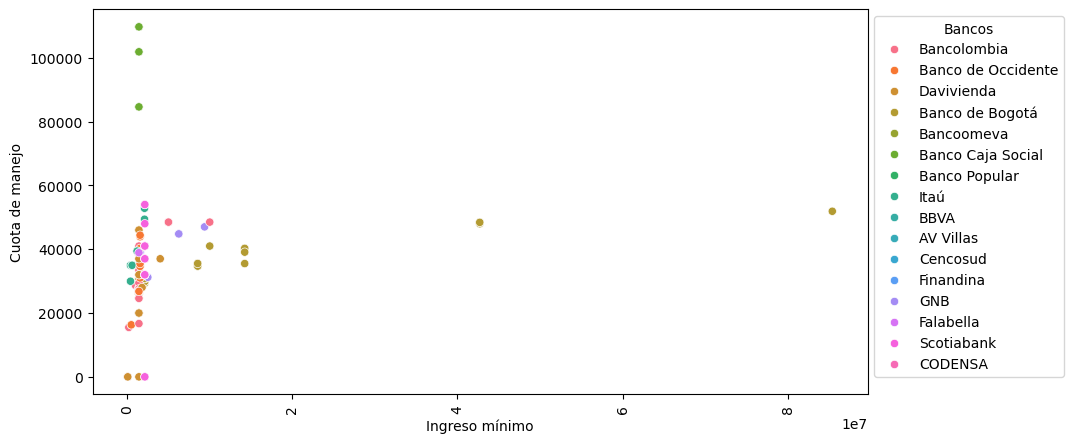

In [16]:
# Creates a scatter plot showing the relationship between 'Ingreso mínimo' (minimum income) 
# and 'Cuota de manejo' (maintenance fee), with points colored by bank ('Bancos').
# The x-axis labels are rotated for better readability, and the legend is moved outside the plot.
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='Ingreso mínimo', y='Cuota de manejo', data=df, hue='Bancos')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

#### The required minimum income remains relatively low, while maintenance fees show more variation than interest rates. Most fees range between 20,000 and 55,000, with some cards offering a 0 fee, likely targeted at students or young customers, or positioned as promotional products. A few credit cards require a high minimum income but maintain a standard maintenance fee, which suggests they could be premium or international products. Additionally, there are some cards with fees above 80,000, which are almost certainly linked to international pricing conversions, as such high fees are highly unlikely for national credit cards in Colombia.

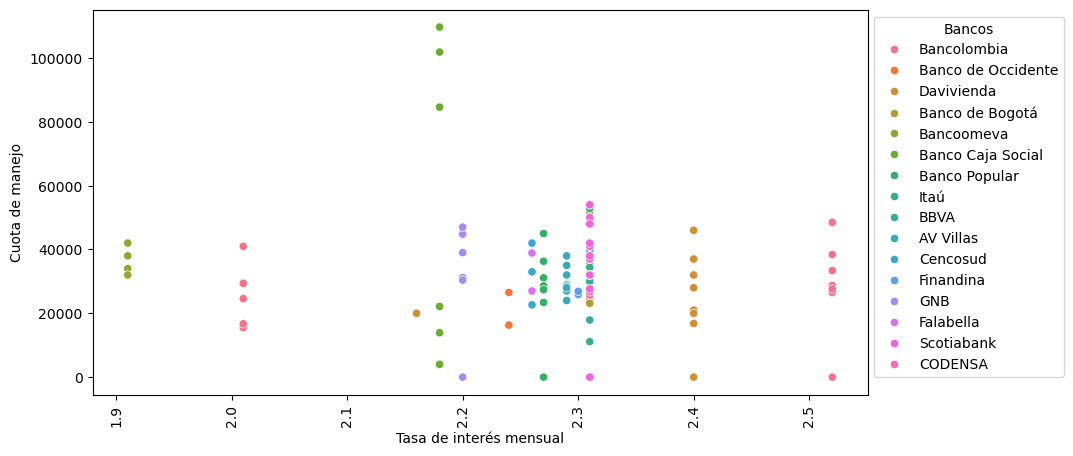

In [18]:
# Creates a figure with a size of 10x5 inches for the visualization.
plt.figure(figsize=(10,5))
# Creates a scatter plot comparing interest rate vs. maintenance fee, colored by bank.
ax=sns.scatterplot(x='Tasa de interés mensual', y='Cuota de manejo', data=df, hue='Bancos')
# Moves the legend to the upper-left area but places it outside the main plot, 
# anchored in the top-right corner of the figure.
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Rotates the X-axis labels 90 degrees to avoid overlap and improve readability.
plt.xticks(rotation=90)
# Displays the final plot.
plt.show()

#### Like in the first plot, we can see a clear separation in the data by interest rate. Most banks remain grouped, with only a few showing higher values, while their maintenance fees stay very similar.

<Axes: xlabel='Tasa de interés mensual', ylabel='Count'>

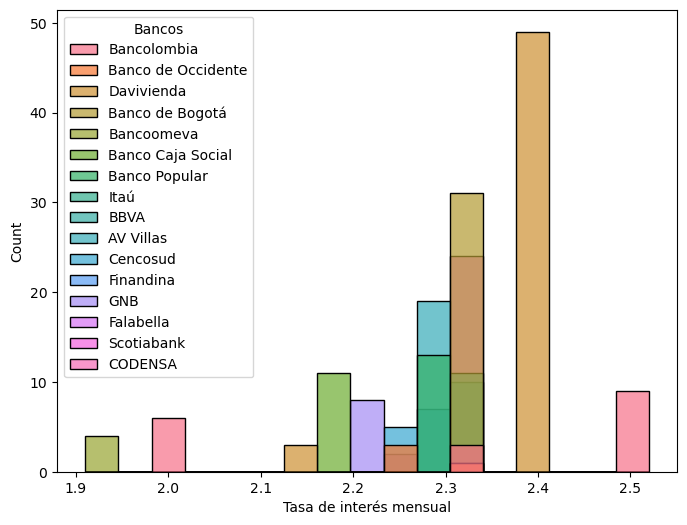

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(x='Tasa de interés mensual', hue='Bancos', data=df, palette='husl', alpha=0.7)

#### Like the previous insight, most banks are grouped together, with only two banks with lower values: Bancolombia and Bancoomeva. the bank with the highest value is also Bancolombia

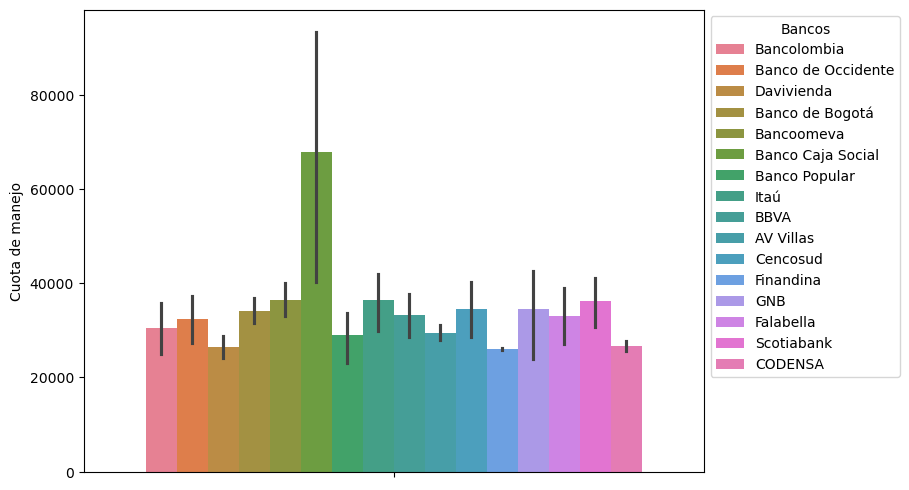

In [21]:
# Creates a new figure with size 8x6 inches for the plot
plt.figure(figsize=(8,6))
# Draws a bar plot showing the 'Maintenance fee' by bank  from the dataframe
ax = sns.barplot(hue='Bancos', y='Cuota de manejo', data=df)
# Moves the legend to the upper left outside of the plot for better readability
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### In this visualization, we can see only the maintenance fee. The banks show values within a similar range, as mentioned in the previous insight, with Caja Social having the highest maintenance fee.

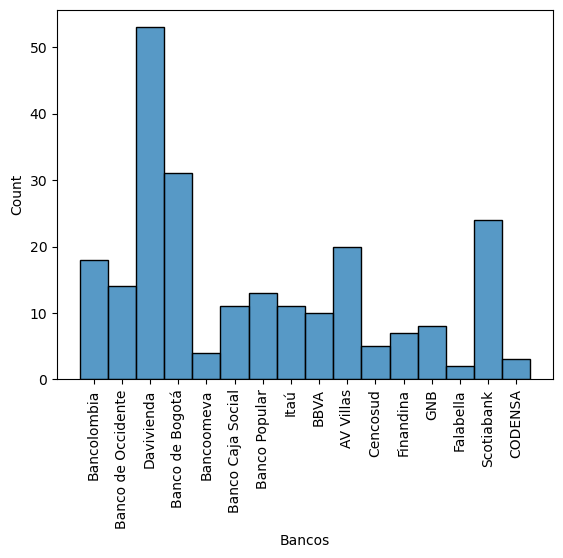

In [84]:
# Creates a histogram showing the distribution of the 'Bancos' column
sns.histplot(data=df, x='Bancos')
# Rotates the x-axis labels 90 degrees for better readability.
plt.xticks(rotation=90)
# Displays the plot 
plt.show()


#### This plot shows the number of products per bank. The three banks with the highest number of products are: Davivienda, with more than 50 credit cards; Banco de Bogotá, with almost 30 products; and Scotiabank, with nearly 25 credit cards. On the other hand, the banks with the lowest number of products are Falabella, with only one product, CODENSA, and Bancoomeva.

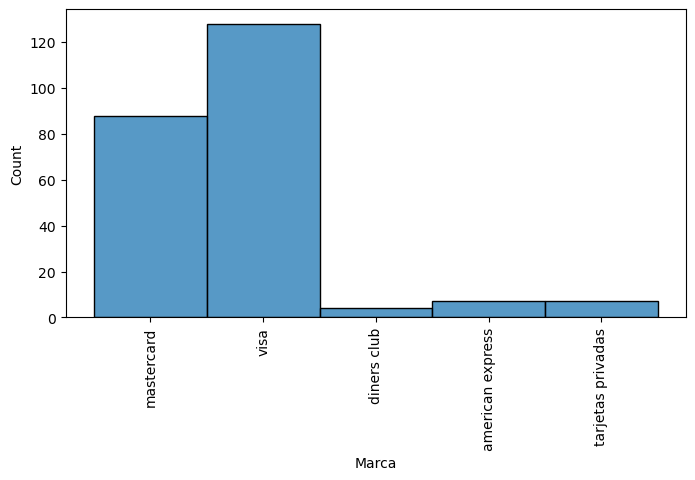

In [24]:
# Creates a histogram showing the distribution of credit cards by 'Marca' (brand).
# The x-axis labels (brands) are rotated 90 degrees to make them easier to read.
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Marca')
plt.xticks(rotation=90)
plt.show()

#### Visa and Mastercard dominate the market with a clear advantage, offering a wide range of benefits. Other brands may provide fewer benefits or position their products as more exclusive.

<Axes: xlabel='Tipo de tarjeta', ylabel='Count'>

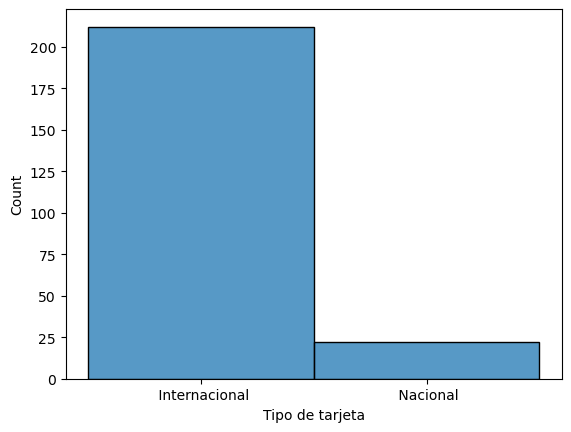

In [43]:
# Creates a histogram that shows the distribution of credit cards by their type
sns.histplot(data=df, x='Tipo de tarjeta')

#### The standar is the international credit cards. the banks preffer to offer products with global coverage, additional benefits as travel insurance, international protection and access to foreign markets. these benefits help justify their maintenance fee. On the other hand, national credit cards are mainly targeted at customers with local needs or those looking for lower cost options

<Axes: xlabel='Tipo de tarjeta', ylabel='Tasa de interés mensual'>

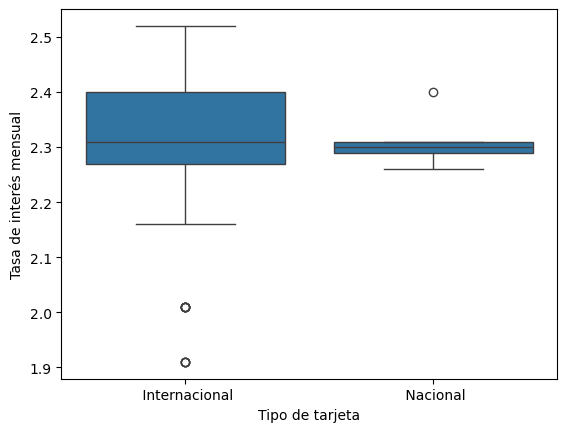

In [46]:
# Creates a boxplot to visualize the distribution of monthly interest rates ('Tasa de interés mensual') 
# across different credit card types ('Tipo de tarjeta').
sns.boxplot(x='Tipo de tarjeta', y='Tasa de interés mensual', data=df)

#### the interest rate of the international credit cards is clustering between 2.2% and 2.4$, also, it has interest rate that it can reach 2.5% o in a particulary cases below of 2%. This tells us the international credit cards let more commercial flexibility and adapt a different costumer profile. on the other hand, the national credit cards have a lower variety in their interest rate, the standard is 2.3%. Therefore, this confirm our last insight, the national credit cards simplefy cost, achieve with regulatory criteria and they are target at costumer with local needs

<Axes: xlabel='Tipo de tarjeta', ylabel='Cuota de manejo'>

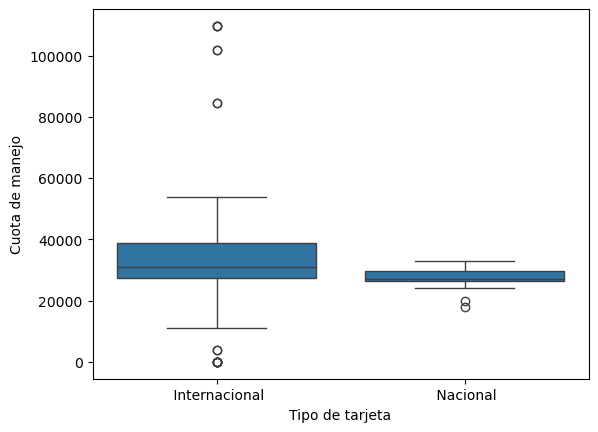

In [49]:
# This line creates a boxplot to visualize the distribution of the maintenance fee (Cuota de manejo) across the different categories of card type (Tipo de tarjeta)
sns.boxplot(x='Tipo de tarjeta', y='Cuota de manejo', data=df)

#### The maintenance fee reflects the flexibility of the international credit cards and how this can change in function of the benefits or costumer target, they have more variety, there are extreme values on the top and down, they are premium products or very exclusive and easy access to the finance world. the national credit cards have a few variety in their costs, this reflects simplicity, accesibility and standar costs

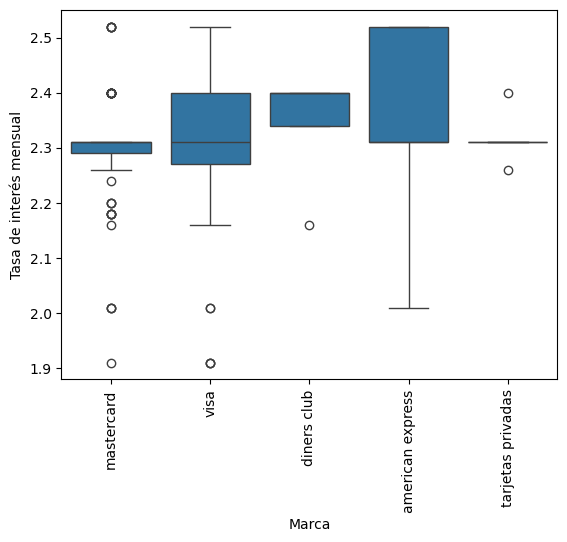

In [96]:
sns.boxplot(x='Marca', y='Tasa de interés mensual', data=df)
plt.xticks(rotation=90)
plt.show()

#### There is no clear standard, they all show wide variability in interest rate. This suggests flexibility in their products and variety for targeting different customer profiles 

In [58]:
df.head(9)

,nombre_tarjeta,Tasa de interés mensual,Ingreso mínimo,Cuota de manejo,Marca,Solicitar,Costo de avance en efectivo,Tipo de tarjeta,Tasa de interes no informada,ingreso minimo no informado,Disponibilidad,Bancos
0,Tarjeta de Crédito Bancolombia Mastercard Joven,2.01,200000,15490,mastercard,Online,6900,Internacional,1,1,1,Bancolombia
1,Tarjeta de Crédito Banco de Occidente Masterca...,2.24,500000,16300,mastercard,Online,6800,Internacional,1,1,1,Banco de Occidente
2,Tarjeta de Crédito Banco de Occidente Visa Joven,2.24,500000,16300,visa,Online,6800,Internacional,1,1,1,Banco de Occidente
3,Tarjeta de Crédito Davivienda Visa Liviana,2.16,1423500,20000,visa,Presencial,6400,Internacional,1,1,1,Davivienda
4,Tarjeta de Crédito Davivienda Diners Club Liviana,2.16,1423500,20000,diners club,Presencial,6400,Internacional,1,1,1,Davivienda
5,Tarjeta de Crédito Davivienda Mastercard Liviana,2.16,1423500,20000,mastercard,Presencial,6400,Internacional,1,1,1,Davivienda
6,Tarjeta de Crédito Banco de Bogotá Biomax Clásica,2.31,1423500,30790,visa,Online,5560,Internacional,1,1,1,Banco de Bogotá
7,Tarjeta de Crédito Banco de Bogotá Movistar Al...,2.31,1423500,26010,mastercard,Online,5560,Internacional,1,1,1,Banco de Bogotá
8,Tarjeta de Crédito Banco de Bogotá Visa Digital,2.31,1423500,24710,visa,Online,5560,Internacional,1,1,1,Banco de Bogotá


In [60]:
df['nombre_tarjeta']

0        Tarjeta de Crédito Bancolombia Mastercard Joven
1      Tarjeta de Crédito Banco de Occidente Masterca...
2       Tarjeta de Crédito Banco de Occidente Visa Joven
3             Tarjeta de Crédito Davivienda Visa Liviana
4      Tarjeta de Crédito Davivienda Diners Club Liviana
                             ...                        
229          Tarjeta de Crédito Fácil CODENSA MasterCard
230     Tarjeta de Crédito Fácil CODENSA Verde - Semilla
231    Tarjeta de Crédito Scotiabank Colpatria PriceS...
232       Tarjeta de Crédito Scotiabank Colpatria Terpel
233    Tarjeta de Crédito Scotiabank Colpatria Visa G...
Name: nombre_tarjeta, Length: 234, dtype: object

In [68]:
df.to_csv('Dataset_credit_cards_df_2.csv', index=False)

# consultas sql

In [ ]:
engine = create_engine('sqlite:///my_data1.db')

df.to_sql('CARDSTABLE', con=engine, if_exists='replace', index=False)

query_cuotas = '''
    SELECT nombre_tarjeta, "Cuota de manejo" 
    FROM CARDSTABLE
    WHERE "Cuota de manejo" > 70000
    ORDER BY "Cuota de manejo" DESC
'''
resultado_cuotas = pd.read_sql(query_cuotas, con=engine)
resultado_cuotas['nombre_tarjeta'].unique()

In [ ]:
z